### **Importing Dependencies:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

### **Data Collection:**

In [ ]:
!git clone https://github.com/dsrscientist/dataset3.git

In [3]:
# Loading the dataset to Pandas DataFrame
data = pd.read_csv('/content/dataset3/glass.csv')
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
data.rename(columns={'1':'Id number','1.52101':'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Glass_type'}, inplace = True)
data

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [5]:
data.drop(['Id number'], axis=1, inplace= True)
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   Glass_type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# Checking missing values
data.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_type    0
dtype: int64

We are having all the values in numbers with no missing values in the dataset.So we don't need any pre-processing  for this dataset.

### **Data Analysis & Correlation:**

In [8]:
# Statistical measures of the dataset
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
col_val= data['Glass_type'].unique().tolist()
col_val

[1, 2, 3, 5, 6, 7]

In [10]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Glass_type,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


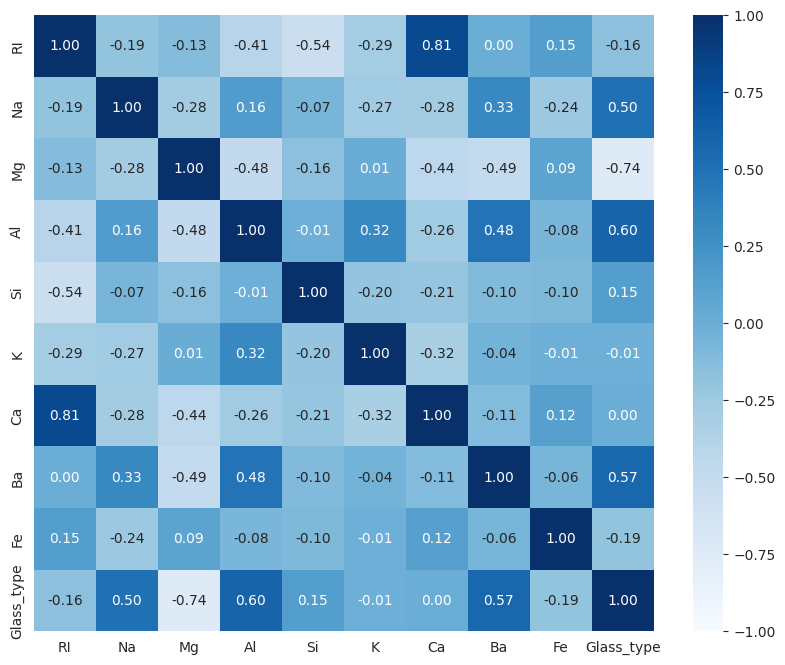

In [11]:
# Constructing a HEATMAP to understand the correlation between the columns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Blues', annot= True, fmt='.2f', vmin= -1.0 , vmax= 1.0)
plt.show()

From the above heatmap matrix we can say that aluminium(Al) with value 0.60 wrt the type feature is contributing more among other features & negetive correlation value indicates that it is inversely propotional to the Glass_type class in this dataset.

### **Splitting the data into Training and Testing data:**

In [12]:
X = data.drop('Glass_type', axis=1).values
y = data['Glass_type'].values.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [14]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213, 9), (170, 9), (43, 9), (170, 1), (43, 1))

## **Model Training:**
* **Logistic Regression model-**



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
model= LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
X_train_Prediction= model.predict(X_train)
X_test_Prediction= model.predict(X_test)

In [19]:
training_data_accuracy_1 = accuracy_score(y_train, X_train_Prediction)
print('Accuracy score of training data:', training_data_accuracy_1)

testing_data_accuracy_1 = accuracy_score(y_test, X_test_Prediction)
print('Accuracy score of testing data:', testing_data_accuracy_1)

Accuracy score of training data: 0.6235294117647059
Accuracy score of testing data: 0.6511627906976745


* **Random Forest Classification model-**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
X_train_Prediction= model.predict(X_train)
X_test_Prediction= model.predict(X_test)

In [24]:
training_data_accuracy_2 = accuracy_score(y_train, X_train_Prediction)
print('Accuracy score of training data:', training_data_accuracy_2)

testing_data_accuracy_2 = accuracy_score(y_test, X_test_Prediction)
print('Accuracy score of testing data:', testing_data_accuracy_2)

Accuracy score of training data: 1.0
Accuracy score of testing data: 0.7441860465116279


* **SVM(Support Vector Machine)-**

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC()

In [27]:
model.fit(X_train, y_train)

SVC()

In [28]:
X_train_Prediction= model.predict(X_train)
X_test_Prediction= model.predict(X_test)

In [29]:
training_data_accuracy_3 = accuracy_score(y_train, X_train_Prediction)
print('Accuracy score of training data:', training_data_accuracy_3)

testing_data_accuracy_3 = accuracy_score(y_test, X_test_Prediction)
print('Accuracy score of testing data:', testing_data_accuracy_3)

Accuracy score of training data: 0.3588235294117647
Accuracy score of testing data: 0.3488372093023256


* **Decision Tree Classifier(CART)-**

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
X_train_Prediction= model.predict(X_train)
X_test_Prediction= model.predict(X_test)

In [34]:
training_data_accuracy_4 = accuracy_score(y_train, X_train_Prediction)
print('Accuracy score of training data:', training_data_accuracy_4)

testing_data_accuracy_4 = accuracy_score(y_test, X_test_Prediction)
print('Accuracy score of testing data:', testing_data_accuracy_4)

Accuracy score of training data: 1.0
Accuracy score of testing data: 0.6744186046511628


### **Comparing the Models:**

Now we can compare the models we use here based on the accuracy score .We only use Testing accuracy to validate a model,so more the test accuracy better the model .

In [35]:
models = [('Logistic Regression', training_data_accuracy_1, testing_data_accuracy_1),
 ('Random Forest Classification', training_data_accuracy_2, testing_data_accuracy_2),
  ('SVM', training_data_accuracy_3, testing_data_accuracy_3),
   ('Decision Tree Classification', training_data_accuracy_4, testing_data_accuracy_4)]

In [36]:
predict = pd.DataFrame(data= models, columns=['Model','Training Accuracy','Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.623529,0.651163
1,Random Forest Classification,1.000000,0.744186
2,SVM,0.358824,0.348837
3,Decision Tree Classification,1.000000,0.674419


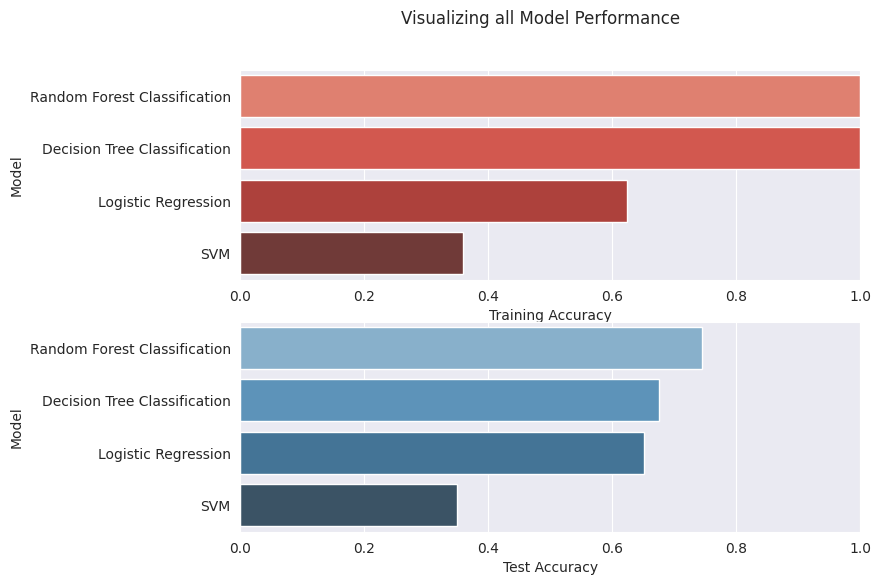

In [37]:
fig, axes = plt.subplots(2,1, figsize=(8,6))
fig.suptitle('Visualizing all Model Performance')

predict.sort_values(by=['Training Accuracy'],ascending=False,   inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data= predict, palette= 'Reds_d' , ax=axes[0])
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['Test Accuracy'],ascending=False,  inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data= predict, palette= 'Blues_d' ,ax=axes[1])
axes[1].set_xlim(0,1.0)

plt.show()

Therefore, we prefer Random Forest Classification model of testing accuracy 0.744186  to predict the Glass_type class .

### **Building a PREDICTIVE System:**

In [38]:
input_data = (1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26)
#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 1,2,3, 4):
  print('WINDOW GLASS')
else:
  print('NON WINDOW GLASS')

[1]
WINDOW GLASS


In [39]:
input_data = (1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00)
#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 5,6,7):
  print('NON WINDOW GLASS')
else:
  print('WINDOW GLASS')

[7]
NON WINDOW GLASS
